# Image Classification using `sklearn.svm`

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
from tqdm import tqdm

### Load images in structured directory like it's sklearn sample dataset

In [2]:
def load_image_files(container_path, dimension=(128, 128,3)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in tqdm(enumerate(folders)):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
            #print(file)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [3]:
image_dataset = load_image_files("datasets/")

24it [01:30,  3.77s/it]


### Split data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

### Train data with parameter optimization

In [6]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, scoring='accuracy', verbose=10)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START C=1, kernel=linear.........................................
[CV 1/5; 1/12] END ..........C=1, kernel=linear;, score=0.626 total time= 6.5min
[CV 2/5; 1/12] START C=1, kernel=linear.........................................
[CV 2/5; 1/12] END ..........C=1, kernel=linear;, score=0.598 total time= 6.4min
[CV 3/5; 1/12] START C=1, kernel=linear.........................................
[CV 3/5; 1/12] END ..........C=1, kernel=linear;, score=0.614 total time= 6.3min
[CV 4/5; 1/12] START C=1, kernel=linear.........................................
[CV 4/5; 1/12] END ..........C=1, kernel=linear;, score=0.600 total time= 6.3min
[CV 5/5; 1/12] START C=1, kernel=linear.........................................
[CV 5/5; 1/12] END ..........C=1, kernel=linear;, score=0.591 total time= 6.5min
[CV 1/5; 2/12] START C=10, kernel=linear........................................
[CV 1/5; 2/12] END .........C=10, kernel=linear;

[CV 1/5; 11/12] END C=1000, gamma=0.001, kernel=rbf;, score=0.651 total time=33.1min
[CV 2/5; 11/12] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 2/5; 11/12] END C=1000, gamma=0.001, kernel=rbf;, score=0.631 total time=32.5min
[CV 3/5; 11/12] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 3/5; 11/12] END C=1000, gamma=0.001, kernel=rbf;, score=0.642 total time=33.0min
[CV 4/5; 11/12] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 4/5; 11/12] END C=1000, gamma=0.001, kernel=rbf;, score=0.619 total time=33.4min
[CV 5/5; 11/12] START C=1000, gamma=0.001, kernel=rbf...........................
[CV 5/5; 11/12] END C=1000, gamma=0.001, kernel=rbf;, score=0.637 total time=32.9min
[CV 1/5; 12/12] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV 1/5; 12/12] END C=1000, gamma=0.0001, kernel=rbf;, score=0.656 total time= 7.9min
[CV 2/5; 12/12] START C=1000, gamma=0.0001, kernel=rbf..........................
[CV

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=10)

### Predict

In [7]:
y_pred = clf.predict(X_test)

### Report

In [8]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=10):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       478
           1       0.56      0.59      0.57        59
           2       0.45      0.65      0.53        65
           3       0.36      0.39      0.38        54
           4       0.42      0.58      0.49        52
           5       0.36      0.42      0.39        52
           6       0.71      0.83      0.76        95
           7       0.38      0.41      0.40        56
           8       0.43      0.46      0.44        35
           9       0.25      0.31      0.28        45
          10       0.41      0.28      0.33        43
          11       0.65      0.28      0.39     

d:\professional\hamim\bangla-song-suggestion-using-face-detection\emotionalenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\professional\hamim\bangla-song-suggestion-using-face-detection\emotionalenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\professional\hamim\bangla-song-suggestion-using-face-detection\emotionalenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []

    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)



In [11]:
sampleClassificationReport = metrics.classification_report(y_test, y_pred)

d:\professional\hamim\bangla-song-suggestion-using-face-detection\emotionalenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\professional\hamim\bangla-song-suggestion-using-face-detection\emotionalenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\professional\hamim\bangla-song-suggestion-using-face-detection\emotionalenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

[0.95, 0.98, 0.96]
[0.56, 0.59, 0.57]
[0.45, 0.65, 0.53]
[0.36, 0.39, 0.38]
[0.42, 0.58, 0.49]
[0.36, 0.42, 0.39]
[0.71, 0.83, 0.76]
[0.38, 0.41, 0.4]
[0.43, 0.46, 0.44]
[0.25, 0.31, 0.28]
[0.41, 0.28, 0.33]
[0.65, 0.28, 0.39]
[0.5, 0.43, 0.46]
[0.67, 0.29, 0.4]
[0.89, 0.67, 0.76]
[0.0, 0.0, 0.0]
[0.4, 0.15, 0.22]
[0.0, 0.0, 0.0]
[0.33, 0.2, 0.25]
[0.6, 0.43, 0.5]
[0.5, 0.17, 0.25]
[0.38, 0.21, 0.27]
[0.0, 0.0, 0.0]
[0.5, 0.11, 0.18]
plotMat: [[0.95, 0.98, 0.96], [0.56, 0.59, 0.57], [0.45, 0.65, 0.53], [0.36, 0.39, 0.38], [0.42, 0.58, 0.49], [0.36, 0.42, 0.39], [0.71, 0.83, 0.76], [0.38, 0.41, 0.4], [0.43, 0.46, 0.44], [0.25, 0.31, 0.28], [0.41, 0.28, 0.33], [0.65, 0.28, 0.39], [0.5, 0.43, 0.46], [0.67, 0.29, 0.4], [0.89, 0.67, 0.76], [0.0, 0.0, 0.0], [0.4, 0.15, 0.22], [0.0, 0.0, 0.0], [0.33, 0.2, 0.25], [0.6, 0.43, 0.5], [0.5, 0.17, 0.25], [0.38, 0.21, 0.27], [0.0, 0.0, 0.0], [0.5, 0.11, 0.18]]
support: [478, 59, 65, 54, 52, 52, 95, 56, 35, 45, 43, 46, 14, 14, 12, 8, 13, 9, 15, 14, 6

<IPython.core.display.Javascript object>


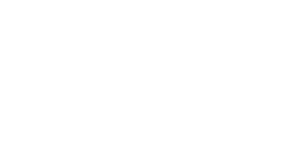

In [12]:
plot_classification_report(sampleClassificationReport)
plt.savefig('test_plot_classif_report_svm.png', dpi=200, format='png', bbox_inches='tight')
plt.close()